In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

madrid = pd.read_csv("Madrid_database.csv",header=0)
print(madrid.head())

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
0  08/09/2018            6        0           5        295.01    299.30   
1  09/09/2018            7        0           1        295.68    302.16   
2  10/09/2018            1        0           0        296.24    302.14   
3  11/09/2018            2        0           1        296.40    303.19   
4  12/09/2018            3        0           4        297.18    303.88   

   Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  ED_5  ED_6  \
0          2.56      3.96     101703.64              0.00281  ...  20.0  13.0   
1          1.26      3.03     101901.04              0.00012  ...  14.0  20.0   
2          2.44      3.57     102190.41              0.00014  ...  14.0  14.0   
3          2.36      3.57     102223.68              0.00139  ...  14.0  14.0   
4          1.39      2.95     102153.50              0.00001  ...  12.0  14.0   

   ED_7  Target_1  Target_2  Target_3  Target_4  Target_5  Tar

In [2]:
madrid['Date'] = pd.to_datetime(madrid['Date'])
print(madrid.dtypes)

Date                   datetime64[ns]
Day_of_week                     int64
Holiday                         int64
Moon_Phase                      int64
Average_Temp                  float64
Max_temp                      float64
Average_wind                  float64
Max_wind                      float64
Average_mslp                  float64
Total_precipitation           float64
Holiday_prev                  float64
ED_1                          float64
ED_2                          float64
ED_3                          float64
ED_4                          float64
ED_5                          float64
ED_6                          float64
ED_7                          float64
Target_1                        int64
Target_2                      float64
Target_3                      float64
Target_4                      float64
Target_5                      float64
Target_6                      float64
Target_7                      float64
dtype: object


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1172\4235069554.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


In [3]:
import pandas as pd

madrid.sort_values(by='Date', inplace=True)

# Define lag function for creating lag features
def create_lag_features(data, columns, lag_days):
    for col in columns:
        for i in range(1, lag_days + 1):
            data[f"{col}_lag_{i}"] = data[col].shift(i)
    return data

# Specify meteorological variables, categorical/calendrical context variables, and persistence-related variables
meteorological_vars = ['Average_Temp', 'Max_temp', 'Average_wind', 'Max_wind', 'Average_mslp', 'Total_precipitation']
context_vars = ['Day_of_week', 'Moon_Phase', 'Holiday']
persistence_vars = ['ED_1', 'ED_2', 'ED_3', 'ED_4', 'ED_5', 'ED_6', 'ED_7']

# Specify the lag days
lag_days = 3

# Create lag features for meteorological variables, context variables, and persistence variables
madrid = create_lag_features(madrid, meteorological_vars, lag_days)
madrid = create_lag_features(madrid, context_vars, lag_days)
madrid = create_lag_features(madrid, persistence_vars, lag_days)

# Drop rows with NaN values resulting from the lag operation
madrid.dropna(inplace=True)

# Display the updated dataset
print(madrid.head())

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
24 2018-02-10            2        0          52        290.96    299.67   
55 2018-02-11            5        0          37        285.74    291.42   
85 2018-02-12            7        0          32        280.05    284.88   
25 2018-03-10            3        0          41        292.89    301.29   
56 2018-03-11            6        0          27        282.90    289.19   

    Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  \
24          3.25      4.23     102182.90              0.00000  ...   
55          2.84      3.91     102124.09              0.00002  ...   
85          1.51      2.33     102529.60              0.00000  ...   
25          1.92      3.40     102161.96              0.00000  ...   
56          1.46      2.38     102147.65              0.00000  ...   

    ED_4_lag_3  ED_5_lag_1  ED_5_lag_2  ED_5_lag_3  ED_6_lag_1  ED_6_lag_2  \
24        24.0        24.0        28.0        23.0

In [4]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the standardized features

# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())


   Day_of_week   Holiday  Moon_Phase  Average_Temp  Max_temp  Average_wind  \
0    -1.001102 -0.196805    0.057633      0.245571  0.526733      0.566229   
1     0.499026 -0.196805   -0.365856     -0.400037 -0.387001      0.204703   
2     1.499111 -0.196805   -0.507018     -1.103774 -1.111344     -0.968054   
3    -0.501060 -0.196805   -0.252925      0.484273  0.706157     -0.606528   
4     0.999068 -0.196805   -0.648181     -0.751287 -0.633987     -1.012143   

   Max_wind  Average_mslp  Total_precipitation  Holiday_prev  ...  ED_4_lag_3  \
0  0.049061      0.629645            -0.377858     -0.198657  ...   -0.987965   
1 -0.151310      0.536645            -0.371996      5.033814  ...   -1.137375   
2 -1.140640      1.177904            -0.377858     -0.198657  ...   -1.336589   
3 -0.470651      0.596532            -0.377858     -0.198657  ...   -1.236982   
4 -1.109332      0.573902            -0.377858     -0.198657  ...   -0.938161   

   ED_5_lag_1  ED_5_lag_2  ED_5_lag_3  ED_6_

In [5]:
from sklearn.model_selection import train_test_split

# Assuming your standardized dataset is stored in a variable called "X_scaled" and target variable in "y"
# X_scaled, y should be obtained after the previous preprocessing steps

# Determine the split index based on the temporal order (e.g., 70% train, 30% test)
split_index = int(0.7 * len(X_scaled))

# Split the data into training and testing sets
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the shapes of the training and testing sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (1032, 65) (1032, 7)
Testing set shapes: (443, 65) (443, 7)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

class ContinuousTrainingLinearRegression:
    def __init__(self):
        self.models = {f'Target_{i}': LinearRegression() for i in range(1, 8)}
        self.X_train = None
        self.y_train = None

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        for target, model in self.models.items():
            model.fit(X_train, y_train[target])

    def predict(self, X_test):
        y_pred = {}
        for target, model in self.models.items():
            y_pred[target] = model.predict(X_test)
        return y_pred

    def update(self, new_X_train, new_y_train):
        for target, model in self.models.items():
            model.fit(np.concatenate([self.X_train, new_X_train]), 
                      pd.concat([self.y_train[target], new_y_train]))

# Initialize ContinuousTrainingLinearRegression model
ctr_lr = ContinuousTrainingLinearRegression()

# Train the initial model
ctr_lr.train(X_train, y_train)

# Make predictions on the test set
y_pred = ctr_lr.predict(X_test)

# Calculate and print Mean Absolute Error (MAE) for each target
initial_mae_values = {}
for i in range(1, 8):
    target = f'Target_{i}'
    mae = mean_absolute_error(y_test[target], y_pred[target])
    initial_mae_values[target] = mae
    print(f"Initial MAE for {target}: {mae}")

# Incorporate new data and continuously train the model
mae_values = {f'Target_{i}': [] for i in range(1, 8)}
for i in range(len(X_test)):
    for j in range(1, 8):
        new_X_train = X_test[i:i+1]
        new_y_train = y_test.iloc[i:i+1][f'Target_{j}']
        ctr_lr.update(new_X_train, new_y_train)
    
    for k in range(1, 8):
        target = f'Target_{k}'
        y_pred = ctr_lr.predict(X_test)
        mae = mean_absolute_error(y_test[target], y_pred[target])
        mae_values[target].append(mae)

for i in range(1, 8):
    target = f'Target_{i}'
    final_mae = mae_values[target][-1]
    print(f"Final MAE for {target}: {final_mae}")

Initial MAE for Target_1: 8.72997766101015
Initial MAE for Target_2: 9.315976848741956
Initial MAE for Target_3: 9.548094331002469
Initial MAE for Target_4: 9.617375789044011
Initial MAE for Target_5: 9.659690896624461
Initial MAE for Target_6: 9.826388576442305
Initial MAE for Target_7: 9.977814722133283
Final MAE for Target_1: 8.729310578561586
Final MAE for Target_2: 9.303987879038017
Final MAE for Target_3: 9.571411160609566
Final MAE for Target_4: 9.626856236460155
Final MAE for Target_5: 9.656301774403403
Final MAE for Target_6: 9.791051669400366
Final MAE for Target_7: 9.944358665583435


In [6]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.neural_network import MLPRegressor
import warnings

class ContinuousTrainingFCDNN:
    def __init__(self, nn_params, batch_size=50, n_iter=50, cv=3):
        self.models = {f'Target_{i}': None for i in range(1, 8)}
        self.X_train = None
        self.y_train = None
        self.batch_size = batch_size
        self.new_X_batch = {f'Target_{i}': [] for i in range(1, 8)}
        self.new_y_batch = {f'Target_{i}': [] for i in range(1, 8)}
        self.nn_params = nn_params
        self.n_iter = n_iter
        self.cv = cv

    def _update_model(self, target):
        nn_search = RandomizedSearchCV(MLPRegressor(random_state=42), param_distributions=self.nn_params, n_iter=self.n_iter, cv=self.cv, scoring='neg_mean_absolute_error', random_state=42)
        new_X = np.concatenate([self.X_train] + self.new_X_batch[target])
        new_y = pd.concat([self.y_train[target]] + self.new_y_batch[target])
        nn_search.fit(new_X, new_y)
        self.models[target] = nn_search.best_estimator_
        self.new_X_batch[target] = []
        self.new_y_batch[target] = []

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        for target in self.models:
            self._update_model(target)

    def predict(self, X_test):
        y_pred = {}
        for target, model in self.models.items():
            y_pred[target] = model.predict(X_test)
        return y_pred

    def update(self, new_X_train, new_y_train):
        for target in self.models:
            self.new_X_batch[target].append(new_X_train)
            self.new_y_batch[target].append(new_y_train)
            if len(self.new_X_batch[target]) >= self.batch_size:
                self._update_model(target)

# Define hyperparameters for the Fully Connected Deep Neural Network (FCDNN)
nn_params = {
    'activation': ['relu', 'sigmoid', 'tanh'],
    'max_iter': [20, 40],
    'batch_size': [8, 16]
}

# Define other parameters
num_folds = 2  # Reduced number of folds for faster computation
batch_size = 25
n_iter = 20  # Reduced number of iterations for RandomizedSearchCV
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

warnings.filterwarnings("ignore")

# Create an instance of ContinuousTrainingFCDNN
ctr_fcdnn = ContinuousTrainingFCDNN(nn_params=nn_params, batch_size=batch_size, n_iter=n_iter, cv=cv)

# Train the initial model
ctr_fcdnn.train(X_train, y_train)

# Make predictions on the test set
y_pred_fcdnn = ctr_fcdnn.predict(X_test)

# Calculate and print Mean Absolute Error (MAE) for each target
mae_values_fcdnn = {f'Target_{i}': [] for i in range(1, 8)}
for i in range(len(X_test)):
    for j in range(1, 8):
        new_X_train = X_test[i:i+1]
        new_y_train = y_test.iloc[i:i+1][f'Target_{j}']
        ctr_fcdnn.update(new_X_train, new_y_train)
        # Update model every 100 data points
        if (i+1) % 100 == 0:  
            for target in ctr_fcdnn.models:
                ctr_fcdnn._update_model(target)

    # Calculate and store updated MAE for each target after all iterations for the current data point
    for k in range(1, 8):
        target = f'Target_{k}'
        y_pred_fcdnn = ctr_fcdnn.predict(X_test)
        mae_fcdnn = mean_absolute_error(y_test[target], y_pred_fcdnn[target])
        mae_values_fcdnn[target].append(mae_fcdnn)

# Print the final updated MAE values for each target after all iterations
for i in range(1, 8):
    target = f'Target_{i}'
    final_mae_fcdnn = mae_values_fcdnn[target][-1]
    print(f"Final MAE for {target} (FCDNN): {final_mae_fcdnn}")


Final MAE for Target_1 (FCDNN): 11.764063647180134
Final MAE for Target_2 (FCDNN): 12.017468680354403
Final MAE for Target_3 (FCDNN): 12.13174062466556
Final MAE for Target_4 (FCDNN): 11.99089378088636
Final MAE for Target_5 (FCDNN): 12.209198905010282
Final MAE for Target_6 (FCDNN): 12.626100066805542
Final MAE for Target_7 (FCDNN): 12.961061780836552


In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
import warnings

class ContinuousTrainingSVR:
    def __init__(self, batch_size=100):
        self.models = {f'Target_{i}': SVR() for i in range(1, 8)}
        self.X_train = None
        self.y_train = None
        self.batch_size = batch_size
        self.new_X_batch = []
        self.new_y_batch = []

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        # Fit SVR models to the training data
        for target, model in self.models.items():
            model.fit(X_train, y_train[target])

    def _update_model(self):
        for target, model in self.models.items():
            # Update SVR models with new data
            model.fit(np.concatenate([self.X_train, np.vstack(self.new_X_batch)]), 
                      pd.concat([self.y_train[target], pd.Series(np.concatenate(self.new_y_batch))]))
        self.new_X_batch = []
        self.new_y_batch = []

    def predict(self, X_test):
        y_pred = {}
        for target, model in self.models.items():
            y_pred[target] = model.predict(X_test)
        return y_pred

    def update(self, new_X_train, new_y_train):
        self.new_X_batch.append(new_X_train)
        self.new_y_batch.append(new_y_train)
        if len(self.new_X_batch) >= self.batch_size:
            self._update_model()

# Define hyperparameters for Support Vector Regression (SVR)
svr_params = {
        'C': np.arange(1, 101),
        'kernel': ['linear', 'rbf'],
        'gamma': np.logspace(-4, -2, 100),
        'epsilon': np.arange(0, 1.1, 0.1),
        'tol': np.logspace(-4, -1, 100)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize ContinuousTrainingSVR model
ctr_svr = ContinuousTrainingSVR(batch_size=100)

# Train the initial model
ctr_svr.train(X_train, y_train)

# Perform hyperparameter optimization
best_params = {}
for target in range(1, 8):
    svr_search = RandomizedSearchCV(SVR(), param_distributions=svr_params, n_iter=20, scoring='neg_mean_absolute_error', random_state=42)
    svr_search.fit(X_train, y_train[f'Target_{target}'])
    best_params[f'Target_{target}'] = svr_search.best_params_

# Update SVR models with the best hyperparameters
for target, params in best_params.items():
    ctr_svr.models[target].set_params(**params)

# Make predictions on the test set
y_pred = ctr_svr.predict(X_test)

# Incorporate new data and continuously train the model
mae_values = {f'Target_{i}': [] for i in range(1, 8)}
for i in range(len(X_test)):
    for j in range(1, 8):
        new_X_train = X_test[i:i+1]
        new_y_train = y_test.iloc[i:i+1][f'Target_{j}']
        ctr_svr.update(new_X_train, new_y_train)
        if (i+1) % 100 == 0:  # Update model every 100 data points
            ctr_svr._update_model()
    
    # Calculate and store updated MAE for each target after all iterations for the current data point
    for k in range(1, 8):
        target = f'Target_{k}'
        y_pred = ctr_svr.predict(X_test)
        mae = mean_absolute_error(y_test[target], y_pred[target])
        mae_values[target].append(mae)

# Print the final updated MAE values for each target after all iterations
for i in range(1, 8):
    target = f'Target_{i}'
    final_mae = mae_values[target][-1]
    print(f"Final MAE for {target}: {final_mae}")




Final MAE for Target_1: 8.912266372066254
Final MAE for Target_2: 9.364659097212861
Final MAE for Target_3: 9.702424500007943
Final MAE for Target_4: 9.766384499864088
Final MAE for Target_5: 9.750971594299978
Final MAE for Target_6: 9.8612547805847
Final MAE for Target_7: 10.027686348753374


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import warnings

class ContinuousTrainingRandomForest:
    def __init__(self, batch_size=100):
        self.models = {f'Target_{i}': RandomForestRegressor(random_state=42) for i in range(1, 8)}
        self.X_train = None
        self.y_train = None
        self.batch_size = batch_size
        self.new_X_batch = {f'Target_{i}': [] for i in range(1, 8)}
        self.new_y_batch = {f'Target_{i}': [] for i in range(1, 8)}

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        for target, model in self.models.items():
            model.fit(X_train, y_train[target])

    def _update_model(self):
        for target, model in self.models.items():
            new_X = np.concatenate([self.X_train] + self.new_X_batch[target])
            new_y = pd.concat([self.y_train[target]] + self.new_y_batch[target])
            model.fit(new_X, new_y)
            self.new_X_batch[target] = []
            self.new_y_batch[target] = []

    def predict(self, X_test):
        y_pred = {}
        for target, model in self.models.items():
            y_pred[target] = model.predict(X_test)
        return y_pred

    def update(self, new_X_train, new_y_train):
        for target in self.models:
            self.new_X_batch[target].append(new_X_train)
            self.new_y_batch[target].append(new_y_train)
            if len(self.new_X_batch[target]) >= self.batch_size:
                self._update_model()

# Define hyperparameters for Random Forest Regression
rf_params = {
    'max_depth': np.arange(1, 21),
    'min_samples_leaf': np.arange(1, 21),
    'criterion': ['mae', 'mse', 'friedman_mse'],
    'n_estimators': np.arange(1, 501),
    'max_features': np.arange(2, 22),
    'bootstrap': [True, False]
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize ContinuousTrainingRandomForest model
ctr_rf = ContinuousTrainingRandomForest(batch_size=100)

# Train the initial model
ctr_rf.train(X_train, y_train)

# Incorporate new data and continuously train the model
mae_values = {f'Target_{i}': [] for i in range(1, 8)}
for i in range(len(X_test)):
    for j in range(1, 8):
        new_X_train = X_test[i:i+1]
        new_y_train = y_test.iloc[i:i+1][f'Target_{j}']
        ctr_rf.update(new_X_train, new_y_train)
        if (i+1) % 100 == 0:  # Update model every 100 data points
            ctr_rf._update_model()
    
    # Calculate and store updated MAE for each target after all iterations for the current data point
    for k in range(1, 8):
        target = f'Target_{k}'
        y_pred = ctr_rf.predict(X_test)
        mae = mean_absolute_error(y_test[target], y_pred[target])
        mae_values[target].append(mae)

# Print the final updated MAE values for each target after all iterations
for i in range(1, 8):
    target = f'Target_{i}'
    final_mae = mae_values[target][-1]
    print(f"Final MAE for {target}: {final_mae}")


Final MAE for Target_1: 9.84985560313777
Final MAE for Target_2: 10.45507144959306
Final MAE for Target_3: 10.413299107048482
Final MAE for Target_4: 10.23436919452737
Final MAE for Target_5: 9.732579329670632
Final MAE for Target_6: 10.08382681462202
Final MAE for Target_7: 10.423526381890719


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, KFold
import pandas as pd
import numpy as np
import warnings

class ContinuousTrainingDecisionTree:
    def __init__(self, tree_params, batch_size=50, n_iter=100, cv=5):
        self.models = {f'Target_{i}': None for i in range(1, 8)}
        self.X_train = None
        self.y_train = None
        self.batch_size = batch_size
        self.new_X_batch = {f'Target_{i}': [] for i in range(1, 8)}
        self.new_y_batch = {f'Target_{i}': [] for i in range(1, 8)}
        self.tree_params = tree_params
        self.n_iter = n_iter
        self.cv = cv

    def _update_model(self, target):
        tree_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=self.tree_params, n_iter=self.n_iter, cv=self.cv, scoring='neg_mean_absolute_error', random_state=42)
        new_X = np.concatenate([self.X_train] + self.new_X_batch[target])
        new_y = pd.concat([self.y_train[target]] + self.new_y_batch[target])
        tree_search.fit(new_X, new_y)
        self.models[target] = tree_search.best_estimator_
        self.new_X_batch[target] = []
        self.new_y_batch[target] = []

    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        for target in self.models:
            self._update_model(target)

    def predict(self, X_test):
        y_pred = {}
        for target, model in self.models.items():
            y_pred[target] = model.predict(X_test)
        return y_pred

    def update(self, new_X_train, new_y_train):
        for target in self.models:
            self.new_X_batch[target].append(new_X_train)
            self.new_y_batch[target].append(new_y_train)
            if len(self.new_X_batch[target]) >= self.batch_size:
                self._update_model(target)

# Define hyperparameters for DecisionTreeRegressor
tree_params = {
    'max_depth': range(1, 21),
    'min_samples_leaf': range(1, 21),
    'criterion': ['mae', 'mse', 'friedman_mse'],
    'min_samples_split': [2],
    'min_weight_fraction_leaf': [0]
}

# Define other parameters
num_folds = 5
batch_size = 50
n_iter = 100
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an instance of ContinuousTrainingDecisionTree
ctr_tree = ContinuousTrainingDecisionTree(tree_params=tree_params, batch_size=batch_size, n_iter=n_iter, cv=cv)

# Train the initial model
ctr_tree.train(X_train, y_train)

# Make predictions on the test set
y_pred = ctr_tree.predict(X_test)

# Calculate and print Mean Absolute Error (MAE) for each target
mae_values = {f'Target_{i}': [] for i in range(1, 8)}
for i in range(len(X_test)):
    for j in range(1, 8):
        new_X_train = X_test[i:i+1]
        new_y_train = y_test.iloc[i:i+1][f'Target_{j}']
        ctr_tree.update(new_X_train, new_y_train)
        # Update model every 100 data points
        if (i+1) % 100 == 0:  
            for target in ctr_tree.models:
                ctr_tree._update_model(target)

    
    # Calculate and store updated MAE for each target after all iterations for the current data point
    for k in range(1, 8):
        target = f'Target_{k}'
        y_pred = ctr_tree.predict(X_test)
        mae = mean_absolute_error(y_test[target], y_pred[target])
        mae_values[target].append(mae)

# Print the final updated MAE values for each target after all iterations
for i in range(1, 8):
    target = f'Target_{i}'
    final_mae = mae_values[target][-1]
    print(f"Final MAE for {target}: {final_mae}")


Final MAE for Target_1: 10.556534718837755
Final MAE for Target_2: 11.572129085135726
Final MAE for Target_3: 11.09254953552967
Final MAE for Target_4: 12.718605316207118
Final MAE for Target_5: 11.232849886791985
Final MAE for Target_6: 11.349893077638392
Final MAE for Target_7: 11.925973553564049


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import warnings

# Define the continuous training function for ELM
def continuous_training_ELM(X_train, y_train, X_test, y_test, param_dist):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Define the ELM model
        elm = GradientBoostingRegressor()
        
        # Loop over each target variable
        for target in y_train.columns:
            # Randomized Search for hyperparameter tuning
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            random_search = RandomizedSearchCV(elm, param_distributions=param_dist, n_iter=10, cv=kf, scoring='neg_mean_absolute_error', random_state=42)
            random_search.fit(X_train, y_train[target])
            
            # Best ELM model
            best_elm_model = random_search.best_estimator_
            
            # Make predictions with the best model
            y_pred_elm = best_elm_model.predict(X_test)
            
            # Evaluate the best model using Mean Absolute Error (MAE)
            mae_elm = mean_absolute_error(y_test[target], y_pred_elm)
            print(f"Mean Absolute Error (MAE) for {target} using Best ELM Model:", mae_elm)
            print("Best ELM Model Parameters:", random_search.best_params_)

# Assuming X_train, X_test, y_train, and y_test are already defined
# Define hyperparameter grid for ELM
param_dist_elm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# Perform continuous training for ELM
continuous_training_ELM(X_train, y_train, X_test, y_test, param_dist_elm)


Mean Absolute Error (MAE) for Target_1 using Best ELM Model: 10.05037822765483
Best ELM Model Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 3, 'learning_rate': 0.1}
Mean Absolute Error (MAE) for Target_2 using Best ELM Model: 11.397688591702165
Best ELM Model Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Mean Absolute Error (MAE) for Target_3 using Best ELM Model: 11.306634060358636
Best ELM Model Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Mean Absolute Error (MAE) for Target_4 using Best ELM Model: 10.476902780213376
Best ELM Model Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.05}
Mean Absolute Error (MAE) for Target_5 using Best ELM Model: 10.950114793732237
Best ELM Model Parameters: {'n_estimators': 100, 'min_sample

In [17]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [8.72, 9.31, 9.57, 9.62, 9.65, 9.79, 9.94]
mae_fcdnn = [11.76, 12.01, 12.13, 11.99, 12.20, 12.62, 12.96]
mae_svr = [8.91, 9.36, 9.71, 9.76, 9.75, 9.86, 10.02]
mae_rf = [9.84, 10.45, 10.41, 10.23, 9.73, 10.08, 10.42]
mae_rt = [10.55, 11.57, 11.09, 12.71, 11.23, 11.34, 11.92]
mae_elm = [10.05, 11.39, 11.30, 10.47, 10.95, 10.30, 10.37]


# Create a DataFrame
data = {
    'Days': days,
    'LR': mae_lr,
    'RT': mae_rt,
    'RF': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}

df = pd.DataFrame(data)

# Calculate averages for each model
averages = {
    'Days': 'Average',
    'LR': round(sum(mae_lr) / len(mae_lr), 3),
    'RT': round(sum(mae_rt) / len(mae_rt), 3),
    'RF': round(sum(mae_rf) / len(mae_rf), 3),
    'SVR': round(sum(mae_svr) / len(mae_svr), 3),
    'ELM': round(sum(mae_elm) / len(mae_elm), 3),
    'FCDNN': round(sum(mae_fcdnn) / len(mae_fcdnn), 3),
}

# Append the averages as a new row

# Append a separator row with empty strings
df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)

# Append the averages as a new row
df = df.append(averages, ignore_index=True)


# Display the DataFrame as a formatted table
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+---------+-------+--------+--------+-------+-------+-------+
|  Days   |  LR   |   RT   |   RF   |  SVR  |  ELM  | FCDNN |
+---------+-------+--------+--------+-------+-------+-------+
| +1 day  | 8.72  | 10.55  |  9.84  | 8.81  | 10.05 | 11.76 |
| +2 days | 9.41  | 11.57  | 10.45  | 9.26  | 11.39 | 12.01 |
| +3 days | 9.57  | 11.09  | 10.41  | 9.71  | 11.3  | 12.13 |
| +4 days | 9.62  | 12.71  | 10.23  | 9.76  | 10.47 | 11.99 |
| +5 days | 9.65  | 11.23  |  9.73  | 9.75  | 10.95 | 12.21 |
| +6 days | 9.79  | 11.34  | 10.08  | 9.86  | 10.3  | 12.62 |
| +7 days | 9.94  | 11.92  | 10.42  | 10.02 | 10.37 | 12.96 |
|         |       |        |        |       |       |       |
| Average | 9.529 | 11.487 | 10.166 | 9.596 | 10.69 | 12.24 |
+---------+-------+--------+--------+-------+-------+-------+


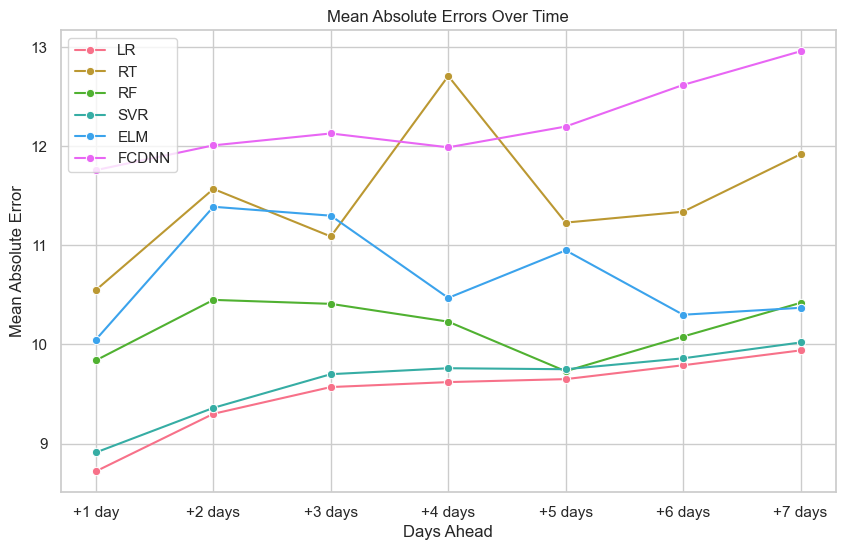

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [8.72, 9.30, 9.57, 9.62, 9.65, 9.79, 9.94]
mae_fcdnn = [11.76, 12.01, 12.13, 11.99, 12.20, 12.62, 12.96]
mae_svr = [8.91, 9.36, 9.70, 9.76, 9.75, 9.86, 10.02]
mae_rf = [9.84, 10.45, 10.41, 10.23, 9.73, 10.08, 10.42]
mae_rt = [10.55, 11.57, 11.09, 12.71, 11.23, 11.34, 11.92]
mae_elm = [10.05, 11.39, 11.30, 10.47, 10.95, 10.30, 10.37]


# Create a DataFrame
data = {
    'Days': days,
    'LR': mae_lr,
    'RT': mae_rt,
    'RF': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}
df = pd.DataFrame(data)

# Create a line plot with error bars
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(df.columns) - 1)  # Adjust the color palette as needed

for i, model in enumerate(df.columns[1:]):
    sns.lineplot(x='Days', y=model, data=df, label=model, marker='o', color=palette[i])

plt.title('Mean Absolute Errors Over Time')
plt.xlabel('Days Ahead')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

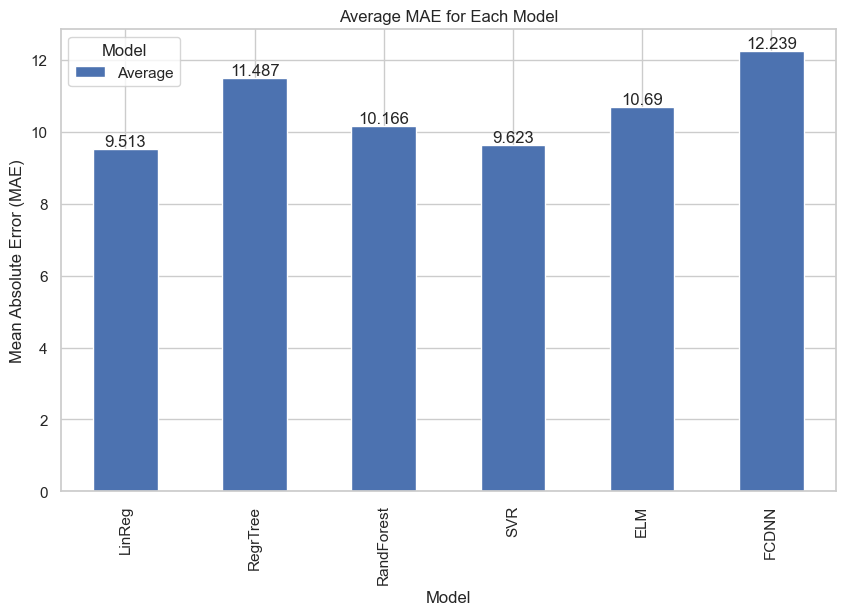

In [12]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [8.72, 9.30, 9.57, 9.62, 9.65, 9.79, 9.94]
mae_fcdnn = [11.76, 12.01, 12.13, 11.99, 12.20, 12.62, 12.96]
mae_svr = [8.91, 9.36, 9.70, 9.76, 9.75, 9.86, 10.02]
mae_rf = [9.84, 10.45, 10.41, 10.23, 9.73, 10.08, 10.42]
mae_rt = [10.55, 11.57, 11.09, 12.71, 11.23, 11.34, 11.92]
mae_elm = [10.05, 11.39, 11.30, 10.47, 10.95, 10.30, 10.37]


# Create a DataFrame
data = {
    'Days': days,
    'LinReg': mae_lr,
    'RegrTree': mae_rt,
    'RandFore': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}

df = pd.DataFrame(data)

# Calculate averages for each model
averages = {
    'Model': 'Average',
    'LinReg': round(sum(mae_lr) / len(mae_lr), 3),
    'RegrTree': round(sum(mae_rt) / len(mae_rt), 3),
    'RandForest': round(sum(mae_rf) / len(mae_rf), 3),
    'SVR': round(sum(mae_svr) / len(mae_svr), 3),
    'ELM': round(sum(mae_elm) / len(mae_elm), 3),
    'FCDNN': round(sum(mae_fcdnn) / len(mae_fcdnn), 3),
}

# Append a separator row with empty strings
df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)

# Append the averages as a new row
df = df.append(averages, ignore_index=True)

# Plot the average values as a bar graph with annotations and legend
averages_df = pd.DataFrame([averages])
averages_df.set_index('Model', inplace=True)

ax = averages_df.T.plot(kind='bar', legend=True, figsize=(10, 6))
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xlabel('Model')
ax.set_title('Average MAE for Each Model')

# Add annotations for each bar
for idx, value in enumerate(averages_df.values.flatten()):
    ax.text(idx, value, str(value), ha='center', va='bottom')

# Display the bar graph
plt.show()